In [12]:
import librosa
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from IPython.display import Audio
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def voice_activity(audio_file_path):
    y, sr = librosa.load(audio_file_path, sr=None)

    frame_length = 2048
    hop_length = 512
    vad = librosa.effects.split(y, top_db=20)

    vad_mask = np.zeros_like(y)
    for start, end in vad:
        vad_mask[start:end] = 1
        
    
    # Plot the audio signal and VAD
    plt.figure(figsize=(11, 3))

    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y, label='Audio Signal')
    plt.title('Audio Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(np.linspace(0, len(y) / sr, num=len(y)), vad_mask, label='VAD', color='red', alpha=0.5)
    plt.title('Voice Activity Detection')
    plt.xlabel('Time (s)')
    plt.ylabel('VAD Mask')

    plt.tight_layout()
    plt.show()



def load_rttm(file_path):
    columns = ['type', 'file', 'channel', 'start_time', 'duration', 'dummy1', 'dummy2', 'speaker', 'dummy3', 'dummy4']
    rttm_df = pd.read_csv(file_path, sep=' ', header=None, names=columns, usecols=['start_time', 'duration', 'speaker'])
    rttm_df['start_time'] = rttm_df['start_time'].astype(float)
    rttm_df['duration'] = rttm_df['duration'].astype(float)
    return rttm_df

def diarization_result(audio_file_path, rttm_file_path):
    # Load audio file
    y, sr = librosa.load(audio_file_path, sr=None)

    # Compute time array for audio signal
    time = np.linspace(0, len(y) / sr, num=len(y))

    # Load RTTM data
    rttm_df = load_rttm(rttm_file_path)
    
    
    colors = cm.get_cmap('Set1', len(rttm_df['speaker'].unique()))
    color_map = {speaker: colors(i) for i, speaker in enumerate(rttm_df['speaker'].unique())}


    plt.figure(figsize=(15, 2))
    plt.plot(time, y, label='Audio Signal', color='black')
    plt.title('Audio Signal with Speaker Diarization')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    for _, segment in rttm_df.iterrows():
        start = segment['start_time']
        end = start + segment['duration']
        speaker = segment['speaker']
        plt.fill_betweenx(
            [-1, 1],  # Y-axis limits for the diarization boxes (adjustable)
            start, end, 
            color=color_map[speaker], 
            alpha=0.4
        )

    plt.ylim(-1, 1)
    speaker_handles = [plt.Line2D([0], [0], color=color_map[speaker], lw=4) for speaker in color_map.keys()]
    plt.legend(speaker_handles, color_map.keys(), loc='center left', bbox_to_anchor=(1, 0.5), title='Speaker')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

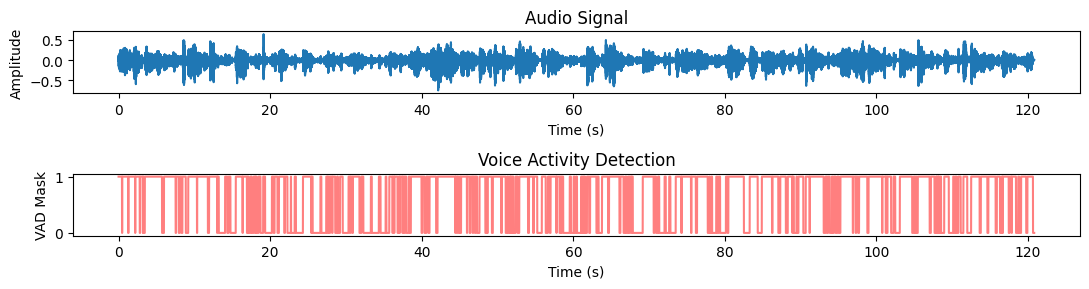

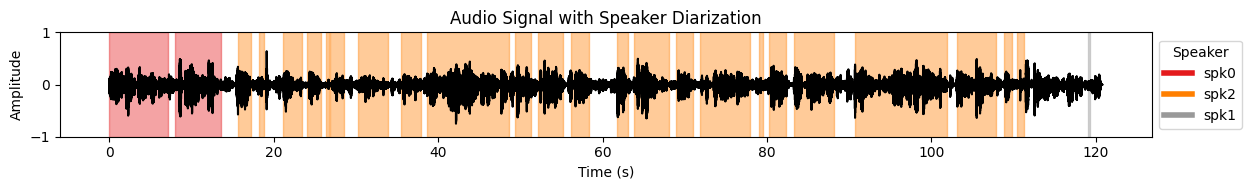

In [16]:
# Example
audio_file_path = 'user_input/user_0/output_voice3.flac'
rttm_file_path = 'user_input/user_0/output_voice3.rttm'

voice_activity(audio_file_path)
diarization_result(audio_file_path, rttm_file_path)
Audio(audio_file_path)